In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\deep learning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('C:/Users/CDSS/Desktop/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,8]

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(xtrain)


C:\ProgramData\Anaconda3\envs\deep learning\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
st.transform(xtrain)
st.transform(xtest)

C:\ProgramData\Anaconda3\envs\deep learning\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\deep learning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-8.30445774e-01, -5.55925448e-01, -2.01274700e+00, ...,
         1.41270682e+00, -8.58597839e-01, -9.48183268e-03],
       [-8.30445774e-01,  2.26601432e-01,  1.48235418e+00, ...,
        -1.28392691e-03,  2.50333273e+00, -9.48183268e-03],
       [-1.12758663e+00,  3.51805733e-01,  4.54383244e-01, ...,
         4.87688429e-02, -2.38206435e-01, -1.02197666e+00],
       ...,
       [-5.33304920e-01,  3.87949809e-02,  4.31948699e-02, ...,
         5.99349311e-01, -3.94781408e-01, -5.15729247e-01],
       [ 6.09767876e-02,  1.95300357e-01,  9.68368711e-01, ...,
         3.11545885e-01,  3.67413746e-01, -4.31354678e-01],
       [-8.30445774e-01, -2.42914696e-01, -2.65196410e-01, ...,
         1.98927153e-01,  2.04930283e-01, -1.02197666e+00]])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
pred = classifier.predict(xtest)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

[[78 24]
 [21 31]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       102
           1       0.56      0.60      0.58        52

   micro avg       0.71      0.71      0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [26]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Mean Error')

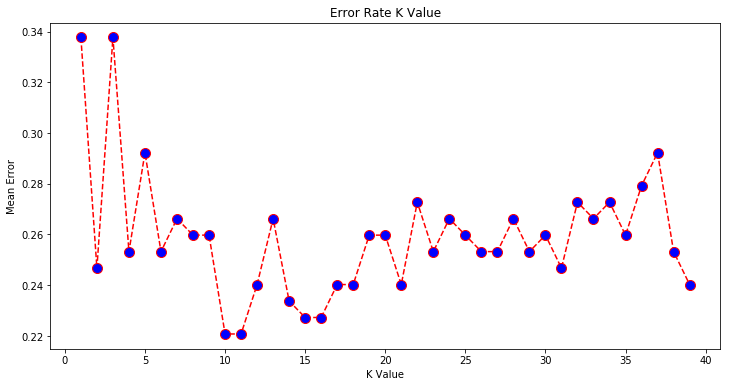

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')